In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the AlexNet model
def create_alexnet(input_shape=(224, 224, 3), num_classes=8):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Create the AlexNet model
model = create_alexnet(input_shape=(224, 224, 3), num_classes=6)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)
model.summary()

# Define ImageDataGenerator without traditional augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for training
val_datagen = ImageDataGenerator(rescale=1./255)    # Only rescaling for validation
test_datagen = ImageDataGenerator(rescale=1./255)   # Only rescaling for test

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/train',   # Path to train folder
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/ganmango224x224/GANDataset224X224/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)





2025-06-04 16:50:46.653032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749055846.844596      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749055846.899365      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749055860.719069      35 gpu_device.cc:2022] Created device /job:localhost/repl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │          24,582 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,771,590 (178.42 MB)

 Trainable params: 46,771,590 (178.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 42000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.


In [2]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749055926.066677      91 service.cc:148] XLA service 0x7c3624002490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749055926.067613      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749055926.537135      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1313 ━━━━━━━━━━━━━━━━━━━━ 3:42:10 10s/step - accuracy: 0.2188 - loss: 1.7979

I0000 00:00:1749055932.184095      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 426s 317ms/step - accuracy: 0.5907 - loss: 0.9928 - val_accuracy: 0.8974 - val_loss: 0.2880
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 156s 119ms/step - accuracy: 0.9077 - loss: 0.2550 - val_accuracy: 0.9567 - val_loss: 0.1318
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 154s 117ms/step - accuracy: 0.9523 - loss: 0.1422 - val_accuracy: 0.9704 - val_loss: 0.0909
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 152s 116ms/step - accuracy: 0.9651 - loss: 0.1000 - val_accuracy: 0.9603 - val_loss: 0.1285
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 150s 114ms/step - accuracy: 0.9746 - loss: 0.0750 - val_accuracy: 0.9718 - val_loss: 0.0857
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 149s 113ms/step - accuracy: 0.9798 - loss: 0.0600 - val_accuracy: 0.9568 - val_loss: 0.1361
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 151s 115ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9808 - val_loss: 0.0603
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 159s 121ms/step - accuracy: 0.9

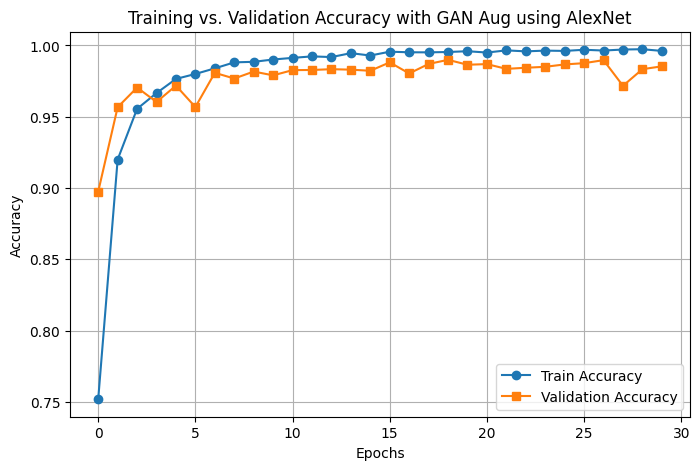

In [3]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy with GAN Aug using AlexNet')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

282/282 ━━━━━━━━━━━━━━━━━━━━ 91s 324ms/step - accuracy: 0.9820 - loss: 0.0781
Test accuracy: 0.9833


282/282 ━━━━━━━━━━━━━━━━━━━━ 27s 93ms/step
Classification Report with GAN Aug using AlexNet:

                    precision    recall  f1-score   support

       ANTHRECNOSE       0.99      0.97      0.98      1500
           DIEBACK       0.99      1.00      1.00      1500
  GALLMILDGEDAMAGE       0.97      0.99      0.98      1500
           HEALTHY       0.99      0.99      0.99      1500
INSECTDAMAGEWEBBER       0.96      0.99      0.97      1500
        LEAFBLIGHT       0.99      0.96      0.98      1500

          accuracy                           0.98      9000
         macro avg       0.98      0.98      0.98      9000
      weighted avg       0.98      0.98      0.98      9000



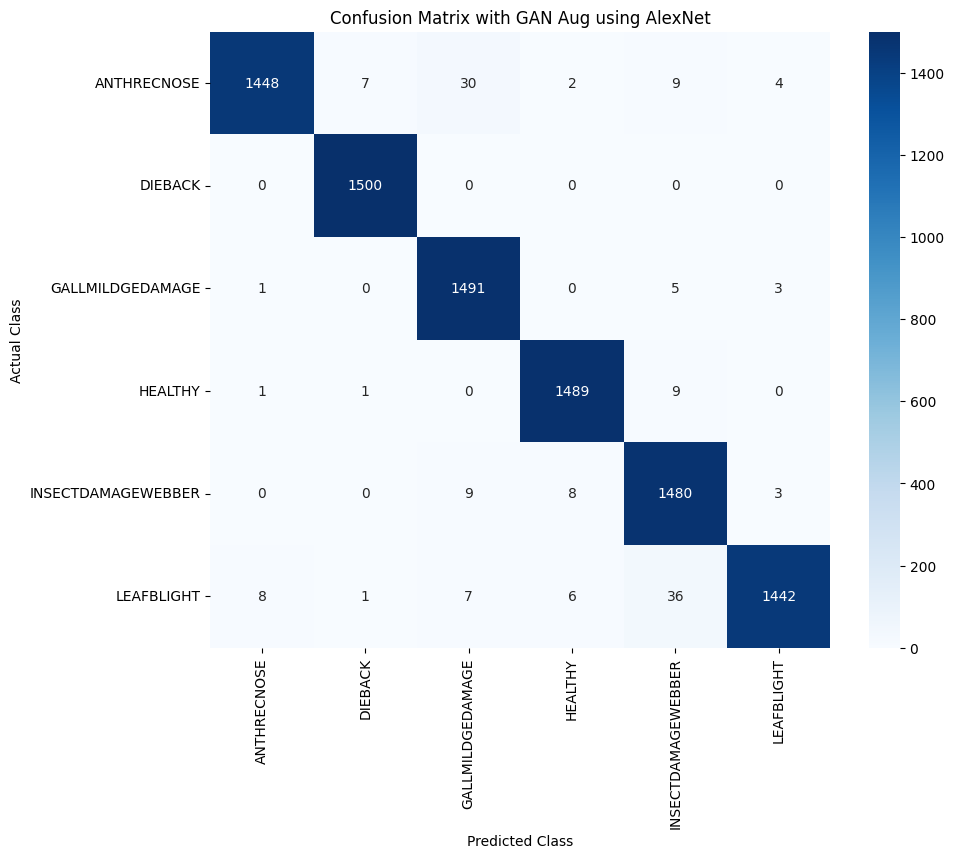

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict on the test set
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report with GAN Aug using AlexNet:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix with GAN Aug using AlexNet")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
